## Final Project Submission

Please fill out:
* Student name: Joseph Szpigiel
* Student pace: Part Time
* Scheduled project review date/time: ??
* Instructor name: ??
* Blog post URL:??


## Import any neccesary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Goal- predict the price of homes based on the given features

## O- Obtain our Data 

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## S - Scrub our Data

Now that we have our data loaded into a DataFrame, we can begin to clean out Data.
Things to look for: 
  - Understand what each feature means
  - Make sure the datatype matches the information given
  - Drop columns that don't contain meaningful data
  - Find missing values and choose how to deal with them:
      - Fill with mean or other value
      - Delete rows
      - Delete columns that are too sparse
  - Indentify placeholder values and deal with them in same ways as missing values
  - Normalize Data
  - One Hot encode any categorical variables

In [3]:
#A quick look at the columns tells us that the id field is a randomly assigned number and not useful for our analysis.
df = df.drop(columns='id')

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


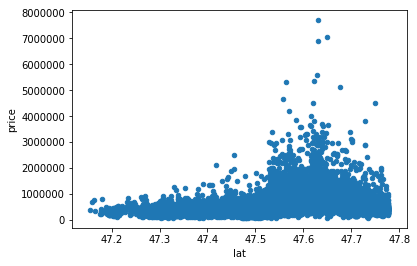

In [8]:
df.plot(x='lat', y='price', kind= 'scatter')

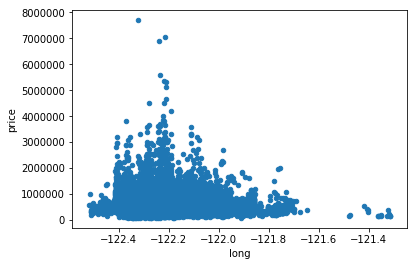

In [9]:
df.plot(x='long', y='price', kind= 'scatter')

In [10]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
#33 rooms is either a placeholder, an error, or a severe outlier
df = df[df.bedrooms < 30]

#### Looking at the datatypes, waterfront should be classified as a boolean (is or is not by the waterfront) and zipcode should be categorical. However, we must first address missing values, as setting waterfront to boolean will set any null values to False

In [ ]:
#df.waterfront = df.waterfront.astype('bool')

In [ ]:
#To view information regarding the date, we first need to set it as a date type.
df.date = df.date.astype('datetime64')

In [ ]:
print(df.date.min(), df.date.max())

In [ ]:
#Since the difference between the earliest year and the latest year of sale is only 1 year, it would not be worth
#considering the value of the dollar in relation to price change. Therefore we will drop the column.
df = df.drop(columns='date')

In [ ]:
df.zipcode = df.zipcode.astype('category')

In [ ]:
df.isna().sum()

In [ ]:
#We see missing values in waterfront, view, and yr_renovated. Each will have to be dealt with individually.

## View null values

#### According to the column dscription, View tells us if the house has been viewed, likely indicating that it is up for sale. Presumably, the number value in the column tells us how many times it has been viewed.

In [ ]:
print(df.view.isnull().sum())
df.view.value_counts()

In [ ]:
63/df.shape[0]

In [ ]:
#null views make up only 0.29% of data, a negligable amount. Therefore we will drop these entries.

In [ ]:
df = df[df.view.notna()]

## Waterfront null values

In [ ]:
print(df.waterfront.isnull().sum())
df.waterfront.value_counts()

In [ ]:
df.waterfront.isnull().sum()/df.shape[0]

#### 11% is too high to drop all null values. We'll need to consider another way to fill the data.

In [ ]:
onwater = df[df.waterfront==1]
nowater = df[df.waterfront==0]
nullwater = df[df.waterfront.isnull()]

In [ ]:
np.log(df.price).describe()

In [ ]:
onwater.price.hist()
plt.show()
nowater.price.hist()
plt.show()
nullwater.price.hist()
plt.show()

In [ ]:
onwater.plot(x='sqft_living', y= 'price', kind='scatter')

In [ ]:
nowater.plot(x='sqft_living', y='price', kind='scatter')

### Year Renovated null values

In [ ]:
print(df.yr_renovated.isnull().sum())

In [ ]:
3830/df.shape[0]

In [ ]:
df[df.yr_renovated>0].yr_renovated.value_counts().sum()/df.shape[0]

In [ ]:
df[df.yr_renovated>0].yr_renovated.describe()

#### Since the years being reported are the years of renovation, and the number of houses that have been renovation only make up 3.45% of the data, it is safe to assume that both those without a year listed and those with zeroes listed have never been renovated and they should be treated the same. Years are not a continuous numerical variable and therefore the data will be binned before further processing, and both zeroes and empties will be it's own category of having not been renovated.

In [ ]:
df.yr_renovated.fillna(value=0, inplace=True)